In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import sklearn
from math import *
from prettytable import PrettyTable
from functools import partial
from decimal import Decimal

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='Microsoft YaHei', font_scale=1,
        palette=palette)  # 解决Seaborn中文显示问题



gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   20   | 3.14083E-04 | 5.08465E-01 | 5.55538E-02 | 3.14083E-04 | 1.08814E-01 
 1 |   40   | 1.49419E-04 | 4.48460E-03 | 1.95622E-03 | 1.49419E-04 | 1.27867E-03 
 2 |   60   | 1.26729E-04 | 2.34918E-03 | 8.28718E-04 | 1.26729E-04 | 6.56768E-04 
 3 |   80   | 7.18976E-05 | 7.95386E-04 | 3.18615E-04 | 7.18976E-05 | 1.68822E-04 
 4 |  100   | 7.18976E-05 | 3.15243E-04 | 1.80861E-04 | 7.18976E-05 | 8.51424E-05 
 5 |  120   | 5.81540E-05 | 1.46089E-04 | 9.65358E-05 | 5.81540E-05 | 2.99164E-05 
 6 |  140   | 4.73689E-05 | 7.21062E-05 | 6.87151E-05 | 4.73689E-05 | 6.48082E-06 
 7 |  160   | 1.14693E-05 | 7.18053E-05 | 5.71283E-05 | 1.14693E-05 | 1.90288E-05 
 8 |  180   | 6.59823E-06 | 6.48317E-05 | 3.74482E-05 | 6.59823E-06 | 2.06568E-05 
 9 |  200   | 6.59823E-06 | 4.73710E-05 | 2.46330E-05 | 6.59823E-06 | 1.44534E-05 
 10|

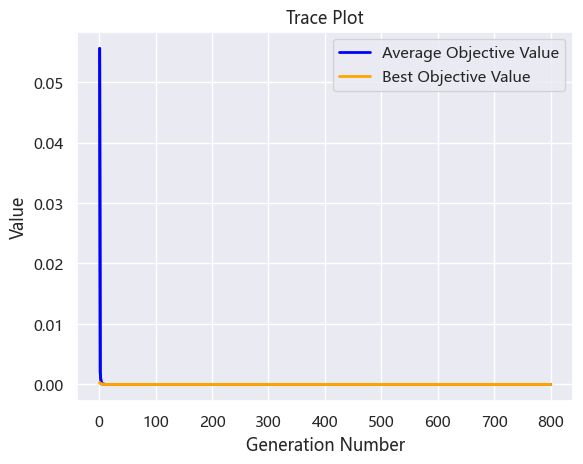

Execution time: 0.3077991008758545 s
Evaluation number: 16000
The best objective value is: 2.220446049250313e-16
The best variables are: 
-3.91155481338501e-08	4.7404319047927856e-07	


In [11]:
import geatpy as ea
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    '''
    x1, x2 = p
    part1 = np.square(x1) - np.square(x2)
    part2 = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(part1)) - 0.5) / np.square(1 + 0.001 * part2)


# 构建问题
r = 1  # 目标函数需要用到的额外数据
@ea.Problem.single
def evalVars(Vars):  # 定义目标函数（含约束）
    f = schaffer(Vars)  # 计算目标函数值
    CV = np.array([])  # 计算违反约束程度
    return f, CV

problem = ea.Problem(name='soea quick start demo',
                        M=1,  # 目标维数
                        maxormins=[1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
                        Dim=2,  # 决策变量维数
                        varTypes=[0, 0],  # 决策变量的类型列表，0：实数；1：整数
                        lb=[-1, -1],  # 决策变量下界
                        ub=[1, 1],  # 决策变量上界
                        evalVars=evalVars)
# 构建算法
algorithm = ea.soea_SEGA_templet(problem,
                                    ea.Population(Encoding='RI', NIND=20),
                                    MAXGEN=800,  # 最大进化代数。
                                    logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                    maxTrappedCount=10)  # 进化停滞计数器最大上限值。
# 求解
res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=False, saveFlag=True, dirName='result')


array([], dtype=float64)